In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/SuperStore/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
# general overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# **Data Cleaning**

**1. Removing null values**

In [ ]:
null_count = df['Postal Code'].isnull().sum()
null_count

11

In [ ]:
# filling 0 to the empty columns
df['Postal Code'].fillna(0, inplace= True)

# chnaging from float to integer
df['Postal Code'] = df['Postal Code'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**2. Checking and removing duplicates**

In [ ]:
if df.duplicated().sum() > 0:
  print("There are duplicates")
else:
  print("There are no duplicates")
  # df.drop_duplicates(inplace= True)

There are no duplicates


In [ ]:
# second method-simple
df.duplicated().sum()

0

In [ ]:
df.duplicated(keep=False).sum()

0

# **Task 1. Customer Segmentation**

In [ ]:
# Types of customer
types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [ ]:
# Number of customers in each segment
number_of_customers = df['Segment'].value_counts()
number_of_customers

,count
Segment,
Consumer,5101
Corporate,2953
Home Office,1746


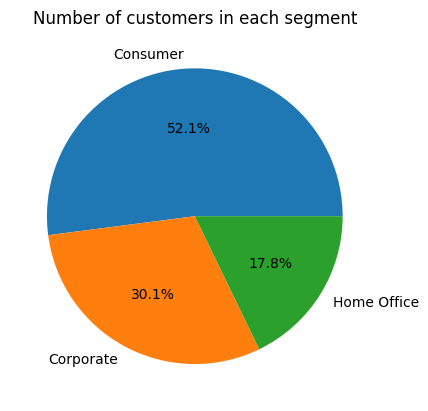

In [ ]:
# Plotting a pie chart
plt.pie(number_of_customers, labels= number_of_customers.index, autopct= '%1.1f%%')
plt.title('Number of customers in each segment')
plt.show()

# **Task 2.Sales per customer Segment**

In [ ]:
sales_per_category = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_category = sales_per_category.rename(columns ={'Segment':'Customer Type' ,'Sales':'Total Sales'})
sales_per_category

,Customer Type,Total Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


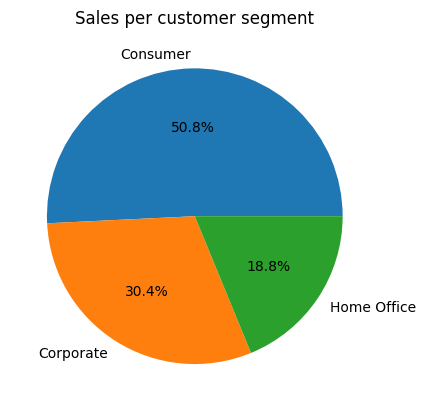

In [ ]:
# Plotting the pie chart
plt.pie(sales_per_category['Total Sales'], labels = sales_per_category['Customer Type'], autopct= '%1.1f%%')
plt.title('Sales per customer segment')
plt.show()

Text(0.5, 0, 'Customer Type')

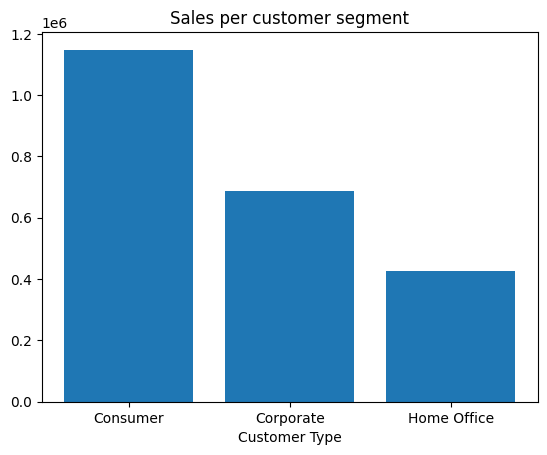

In [ ]:
# Bar Graph
plt.bar(sales_per_category['Customer Type'], sales_per_category['Total Sales'])
plt.title('Sales per customer segment')
plt.xlabel('Customer Type')

# **Task 3. Customer Loyalty**

In [ ]:
# 1. Group data according to Cusetomer ID, Customer Name, Segment and calculate freq.

customer_order_freq = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customer_order_freq = customer_order_freq.rename(columns = {'Order ID':'Order Frequency'})
# repeat_customers = customer_order_freq[customer_order_freq['Order Frequency']>=1]

# sort customer in descending order
sorted_repeat_customers = customer_order_freq.sort_values(by= 'Order Frequency', ascending= False)
sorted_repeat_customers


,Customer ID,Customer Name,Segment,Order Frequency
787,WB-21850,William Brown,Consumer,35
606,PP-18955,Paul Prost,Home Office,34
482,MA-17560,Matt Abelman,Home Office,34
387,JL-15835,John Lee,Consumer,33
147,CK-12205,Chloris Kastensmidt,Consumer,32
...,...,...,...,...
681,SC-20845,Sung Chung,Consumer,1
456,LD-16855,Lela Donovan,Corporate,1
403,JR-15700,Jocasta Rupert,Consumer,1
637,RE-19405,Ricardo Emerson,Consumer,1


In [ ]:
#2. Group data based on: Customer ID, Customer Name and Sales

customer_sales = df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().reset_index()
customer_sales = customer_sales.sort_values(by= 'Sales', ascending= False)
customer_sales

,Customer ID,Customer Name,Sales
700,SM-20320,Sean Miller,25043.050
741,TC-20980,Tamara Chand,19052.218
621,RB-19360,Raymond Buch,15117.339
730,TA-21385,Tom Ashbrook,14595.620
6,AB-10105,Adrian Barton,14473.571
...,...,...,...
508,MG-18205,Mitch Gastineau,16.739
145,CJ-11875,Carl Jackson,16.520
681,SC-20845,Sung Chung,14.112
456,LD-16855,Lela Donovan,5.304


# **Task 4. Mode of Shipping**

In [ ]:
type_of_shipping = df['Ship Mode'].unique()
type_of_shipping

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
# Frequency use of shipping methods
shipping_mode = df['Ship Mode'].value_counts().reset_index()
shipping_mode = shipping_mode.rename(columns = {'Ship Mode':'Shipping Mode', 'count':'Count'})
shipping_mode

,Shipping Mode,Count
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


Text(0.5, 1.0, 'Mode of shipping')

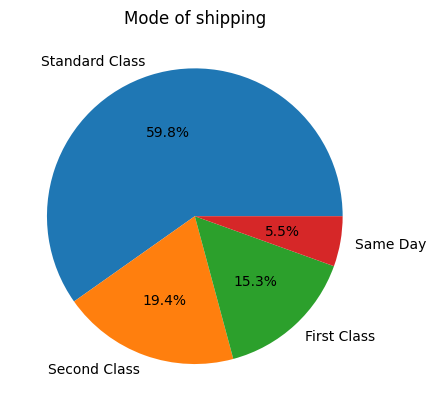

In [ ]:
plt.pie(shipping_mode['Count'], labels= shipping_mode['Shipping Mode'], autopct= '%1.1f%%')
plt.title('Mode of shipping')

In [ ]:
# Total sales by ship mode
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum()
ship_mode_sales

,Sales
Ship Mode,
First Class,3.455723e+05
Same Day,1.252190e+05
Second Class,4.499142e+05
Standard Class,1.340831e+06


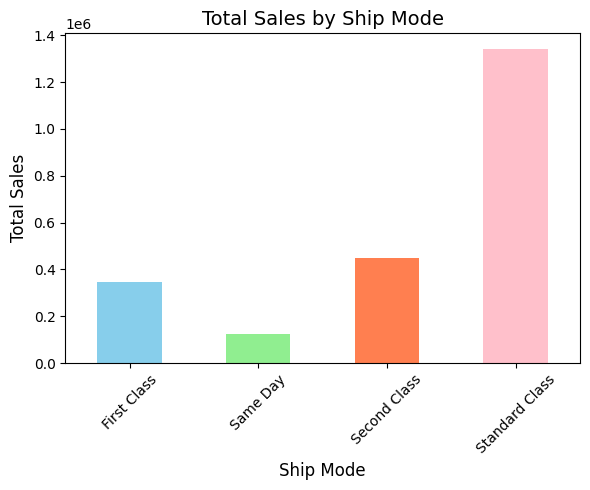

In [ ]:
# Plotting the sales by ship mode
plt.figure(figsize=(6, 5))
ship_mode_sales.plot(kind='bar', color=['skyblue', 'lightgreen', 'coral', 'pink'])

plt.title('Total Sales by Ship Mode', fontsize=14)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Task 5. Geographical Analysis**

**1. Customer by state**

In [ ]:
# Customer by state
state = df['State'].value_counts().reset_index()
state = state.rename(columns = {'count':'Number of Customers'})
state.head(7)

,State,Number of Customers
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,454


**2. Customer by City**

In [ ]:
# Customer by City
city = df['City'].value_counts().reset_index()
city = city.rename(columns = {'count':'Number of Customers'})
city.head(7)

,City,Number of Customers
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308


**3. Sales per state**

In [ ]:
# Sales per state

sales_per_state = df.groupby('State')['Sales'].sum().reset_index()
sales_per_state = sales_per_state.sort_values(by= 'Sales', ascending= False)
sales_per_state.head(10)

,State,Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500
8,Florida,88436.5320
11,Illinois,79236.5170
20,Michigan,76136.0740
33,Ohio,75130.3500
44,Virginia,70636.7200


**4. Sales per city**

In [ ]:
# Sales per city

sales_per_city = df.groupby('City')['Sales'].sum().reset_index()
sales_per_city = sales_per_city.sort_values(by= 'Sales', ascending= False)
sales_per_city.head(10)

,City,Sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


# **Task 6: Product Category Analysis**

**1. Types of Product categories**

In [ ]:
product_categories = df['Category'].unique()
product_categories

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()

# sort in descending order
suncategory_count = subcategory_count.sort_values(by= 'Sub-Category', ascending= False)
subcategory_count

,Category,Sub-Category
0,Furniture,4
1,Office Supplies,9
2,Technology,4


**2. Sales per each category**

In [ ]:
category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()

# sort in descending order
category_sales = category_sales.sort_values(by= 'Sales', ascending= False)
category_sales

,Category,Sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


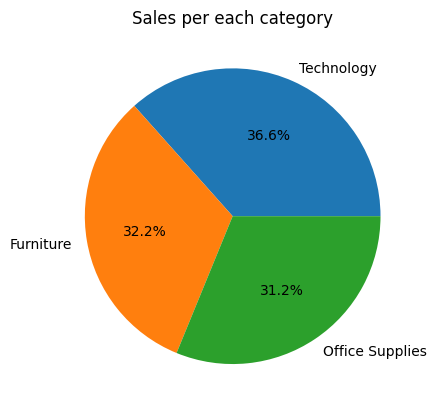

In [ ]:
# Plotting a pie chart
plt.pie(category_sales['Sales'], labels= category_sales['Category'], autopct= '%1.1f%%')
plt.title('Sales per each category')
plt.show()

**3. product sub-category vs sales**

In [ ]:
product_sub_category_sales = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

# Sorting in descending order
product_sub_category_sales = product_sub_category_sales.sort_values(by= 'Sales', ascending= False)
product_sub_category_sales

,Sub-Category,Sales
13,Phones,327782.4480
5,Chairs,322822.7310
14,Storage,219343.3920
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,164186.7000
6,Copiers,146248.0940
4,Bookcases,113813.1987
1,Appliances,104618.4030


Text(0, 0.5, 'Sub-Category')

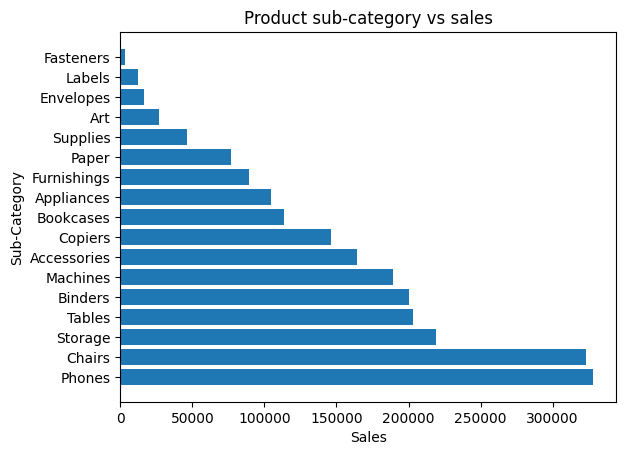

In [ ]:
# Plotting a graph

plt.barh(product_sub_category_sales['Sub-Category'], product_sub_category_sales['Sales'])
plt.title('Product sub-category vs sales')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')

**4. Top Products by Sales**

In [ ]:
top_products_by_revenue = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products_by_revenue

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


# **Task 7: Sales Trend Aanalysis**

**1. Total Sales over Years**

In [6]:
# Convert Order date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True ,errors='coerce' )

# grouping by year and summing the sales per year
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
yearly_sales = yearly_sales.rename(columns= {'Order Date':'Year', 'Sales':'Total Sales'})
yearly_sales

,Year,Total Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


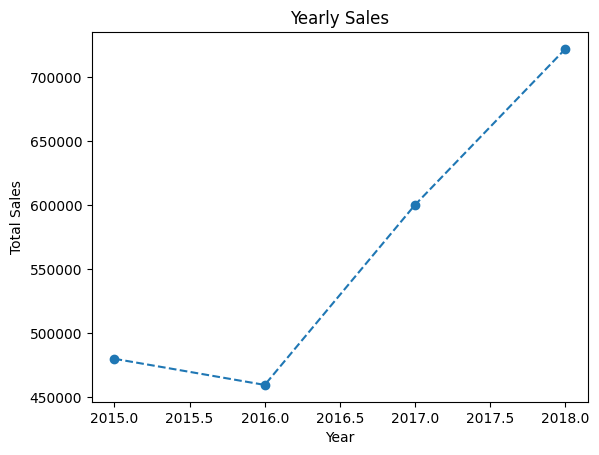

In [7]:
# plotting the bar graph
# plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])
# plt.title('Yearly Sales')
# plt.xlabel('Year')
# plt.ylabel('Total Sales')

# plotting a line graph
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='--')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

**2. Quarterly Sales**

In [8]:
# Quarterly sales of year 2018
year_sales = df[df['Order Date'].dt.year ==2018]
quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum().reset_index()
quarterly_sales

,Order Date,Sales
0,2018-03-31,122260.8842
1,2018-06-30,127558.6200
2,2018-09-30,193815.8400
3,2018-12-31,278416.6750


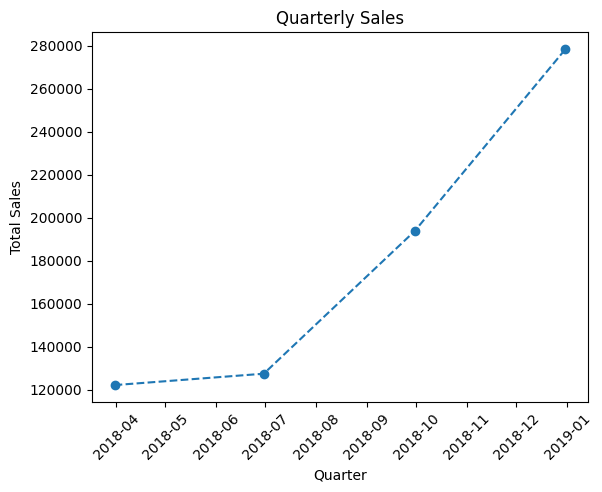

In [9]:
# plotting a line graph
plt.plot(quarterly_sales['Order Date'], quarterly_sales['Sales'], marker='o', linestyle='--')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

**3. Monthly Sales**

In [10]:
# Monthly sales of year 2018
year_sales = df[df['Order Date'].dt.year ==2018]
monthly_sales = year_sales.resample('M', on='Order Date')['Sales'].sum().reset_index()
monthly_sales

,Order Date,Sales
0,2018-01-31,43476.4740
1,2018-02-28,19920.9974
2,2018-03-31,58863.4128
3,2018-04-30,35541.9101
4,2018-05-31,43825.9822
5,2018-06-30,48190.7277
6,2018-07-31,44825.1040
7,2018-08-31,62837.8480
8,2018-09-30,86152.8880
9,2018-10-31,77448.1312


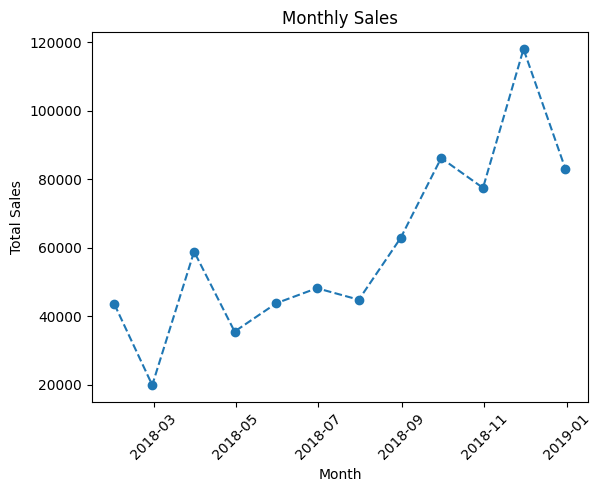

In [11]:
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o', linestyle='--')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

**4. Order Processing time**

In [16]:
# Calculate the processing time in days
df['Processing Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

# Analyzing the processing time
processing_time_analysis = df['Processing Time (Days)'].describe()
processing_time_analysis

,Processing Time (Days)
count,9800.000000
mean,3.961122
std,1.749614
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


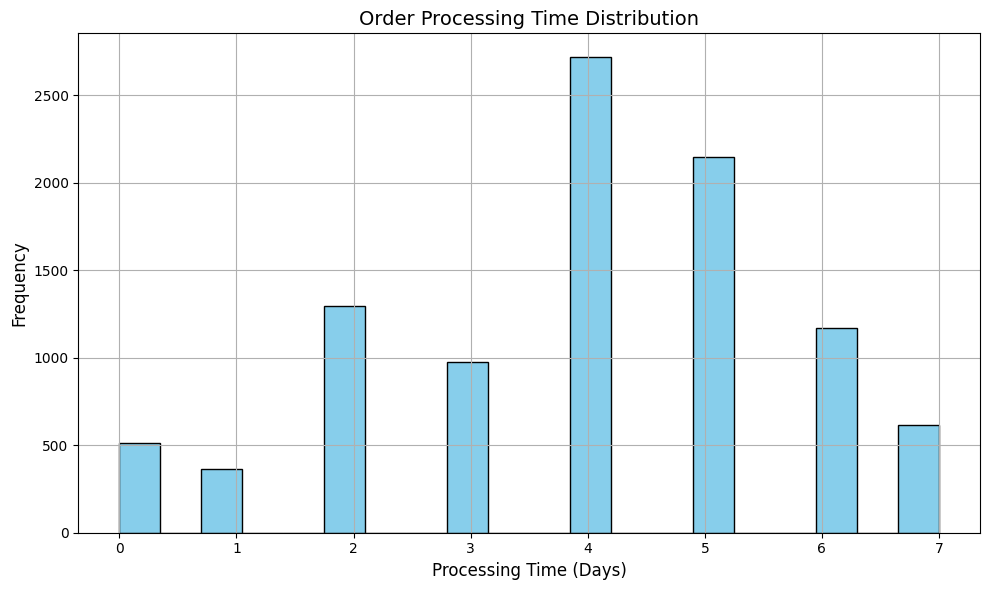

In [22]:
# Plotting a histogram to visualize the distribution of processing times
plt.figure(figsize=(10, 6))
plt.hist(df['Processing Time (Days)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Order Processing Time Distribution', fontsize=14)
plt.xlabel('Processing Time (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

**5. Custoemr Aquisition Trend**

In [24]:
df.sort_values('Order Date', inplace=True)

# Group by 'Customer ID' to find the first purchase date for each customer
customer_first_purchase = df.groupby('Customer ID')['Order Date'].min()
customer_first_purchase = customer_first_purchase.reset_index()
customer_first_purchase.set_index('Order Date', inplace=True)

quarterly_acquisition = customer_first_purchase.resample('Q').size()
quarterly_acquisition

,0
Order Date,
2015-03-31,118
2015-06-30,155
2015-09-30,161
2015-12-31,155
2016-03-31,33
2016-06-30,36
2016-09-30,38
2016-12-31,34
2017-03-31,14
